<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 2
#### Ana Nuñez


# Consigna
Dado el siguiente circuito:

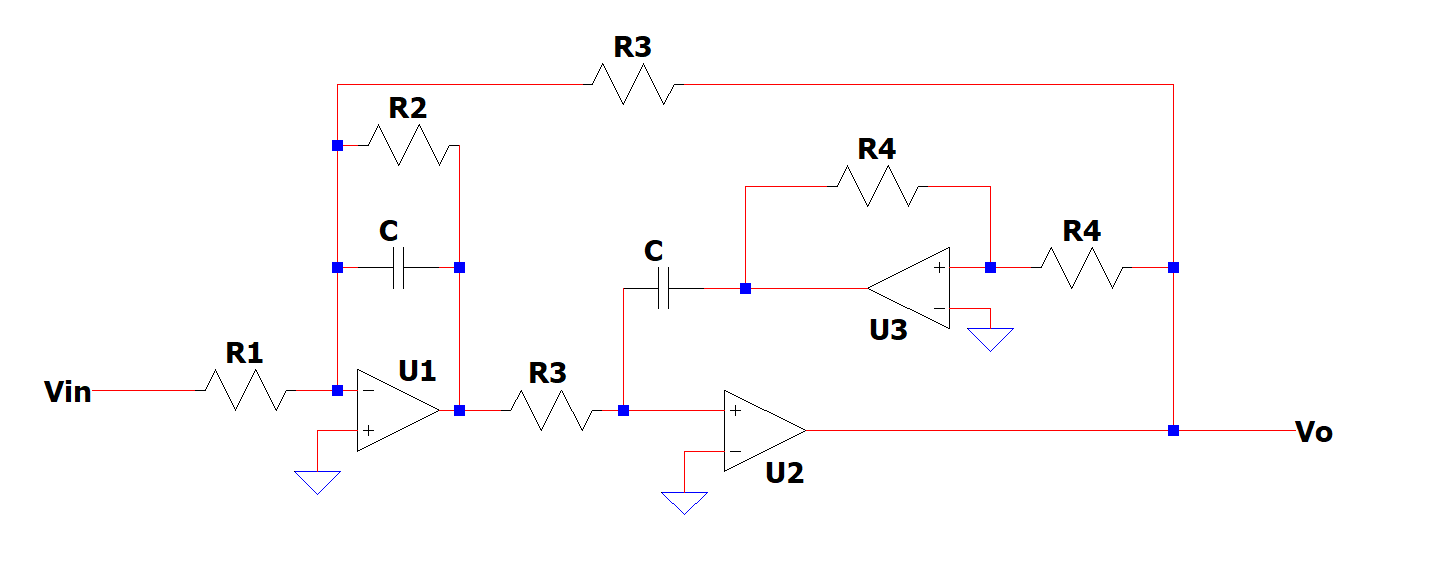

1. Hallar la transferencia T=Vo/Vi en función de ωo y Q

2. Obtener el valor de los componentes del circuito de forma tal que ωo=1 y Q=3

3. Ajustar el valor de R1 de forma tal que |T(0)|=20dB

### Bonus:

+10 💎 Obtener los valores de la red normalizados en frecuencia e impedancia.

+10 🎓 Calcular las sensibilidades  $S^{ωo}_C, S^Q_{R2} y S^Q_{R3} $

+10 🤯 Recalcular los valores de la red para que cumpla con una transferencia Butterworth.

+10  🎸 Cómo podría obtener un circuito pasabanda con los mismos componentes originales y con qué parámetros quedaría diseñado (Ver ejemplo 4.6 en Schaumann).

+10  ⚽️ Simulación circuital de todos los experimentos.

+10  🍺 Presentación en jupyter notebook


# Desarrollo analítico


In [1]:
from IPython.display import IFrame
IFrame("./TS2.pdf", width=1000, height=1000)

# Simulación del circuito en LTSpice

Se realizó la simulación en LTSpice para corroborar los resultados obtenidos. A continuación se muestran el circuito y su transferencia. 

Es importante destacar que el eje "x" de la simulación se encuentra en Hz, mientras que el análisis se hace en 1/seg.

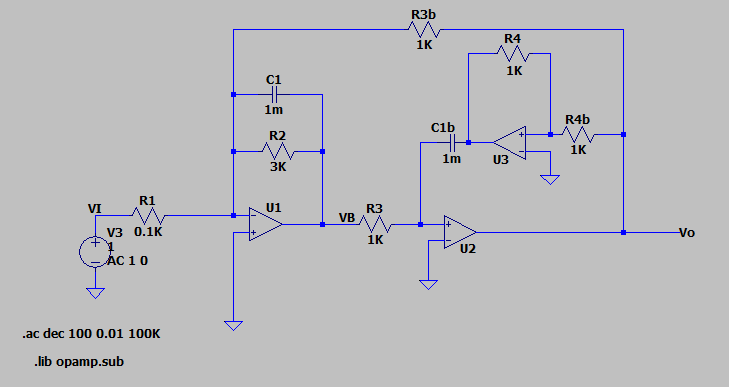

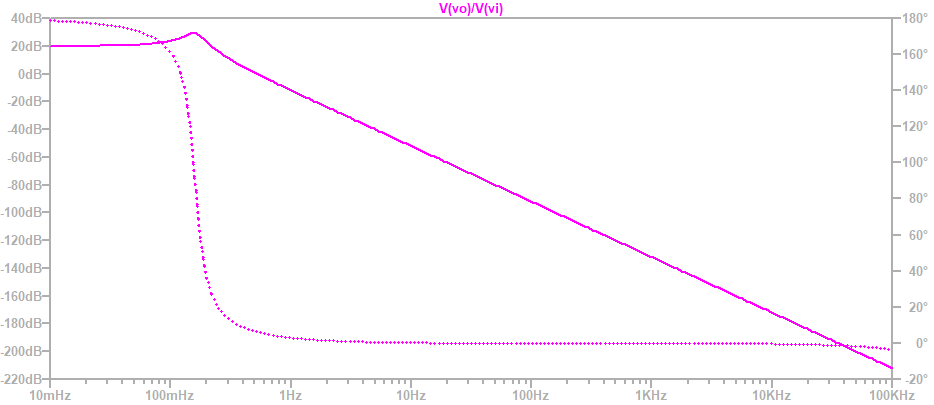

Se le aplican los cursores al gráfico para marcar los puntos importantes y se corrobora que $|T(\omega = 0)| = 20 dB$ y que el punto de inflexion se encuentra en $\omega = 1 $ o $ f = 160mHz$

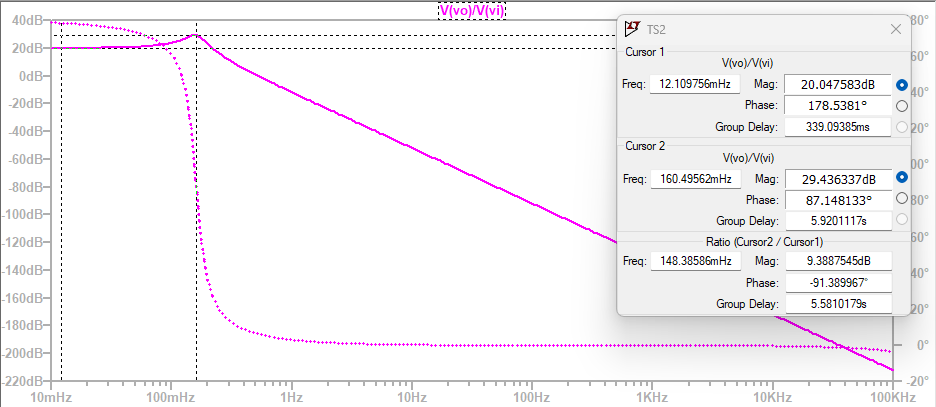